In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
import os
import shutil

os.makedirs('/content/data', exist_ok=True)

# Copy the data files from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/data/data_p14_preprocessed.csv', '/content/data/data_p14_preprocessed.csv')

# Copy scripts from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/feature_selectors.py', '/content/feature_selectors.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/mlp_classifier.py', '/content/mlp_classifier.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/utils.py', '/content/utils.py')

'/content/utils.py'

# Error (recording) condition MLP classifier

As expected, when using the KNN to classify the error condition, the performance for audio source only is poor. Testing to see if using the MLP improves the performance, as it was shown in Furkan thesis that it was well suited for phonation mode classification.

In [4]:
# Example of calling the function
DATA_FILE = 'data/data_p14_preprocessed.csv'
HIDDEN_LAYER_SIZE = 12
RANDOM_STATE = 42

from mlp_classifier import train_mlp, evaluate_mlp
from utils import prepare_data, plot_confusion_matrix, standardize_x_data, remove_specified_conditions
from sklearn.model_selection import train_test_split

## 1. All Data

Mean cross-validated F1 score: 0.998036453874953
f1 score:  0.9994191606021887
Classification Report:
                   precision    recall  f1-score   support

high_articulation       1.00      1.00      1.00      1958
 low_articulation       1.00      1.00      1.00      1956
  chest_breathing       1.00      1.00      1.00      2196
          correct       1.00      1.00      1.00      1897
     hunched_back       1.00      1.00      1.00      1938
         sideways       1.00      1.00      1.00      1807
      arched_back       1.00      1.00      1.00      2020

         accuracy                           1.00     13772
        macro avg       1.00      1.00      1.00     13772
     weighted avg       1.00      1.00      1.00     13772



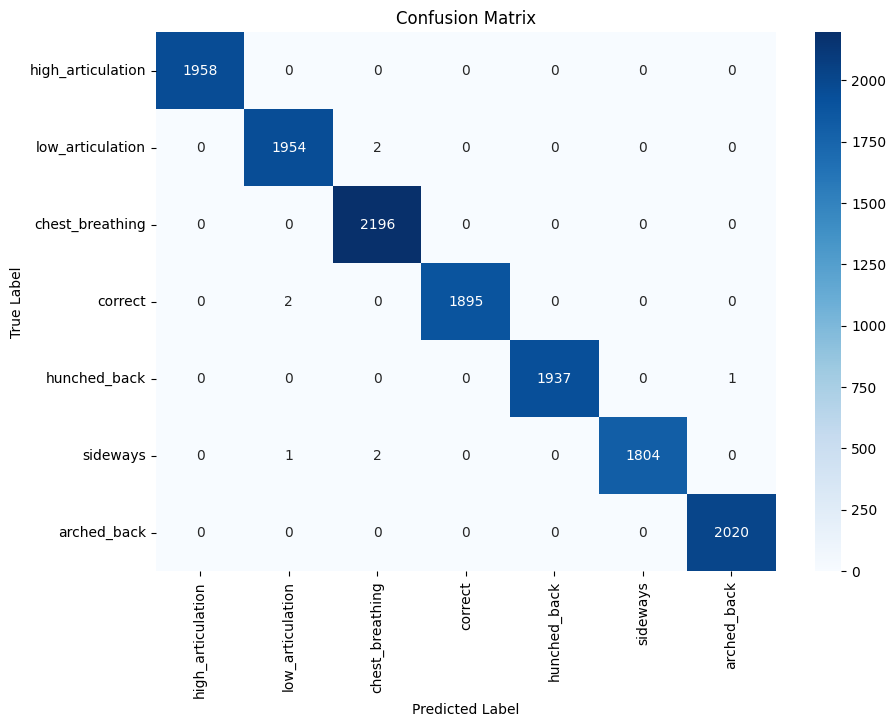

In [5]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition')
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

# Evaluate MLP on test set
f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 features

Selected features:  Index(['computer_pose_landmark_6_z', 'computer_pose_landmark_7_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Mean cross-validated F1 score: 0.7551647256339591
f1 score:  0.7514510255479576
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.89      0.92      0.91      1958
 low_articulation       0.51      0.56      0.53      1956
  chest_breathing       0.79      0.83      0.81      2196
          correct       0.59      0.44      0.50      1897
     hunched_back       0.99      0.99      0.99      1938
         sideways       0.55      0.63      0.59      1807
      arched_back       0.94      0.87      0.90      2020

         accuracy                           0.75     13772
        macro avg       0.75      0.75      0.75     13772
     weighted avg       0.75      0.75      0.75     13772



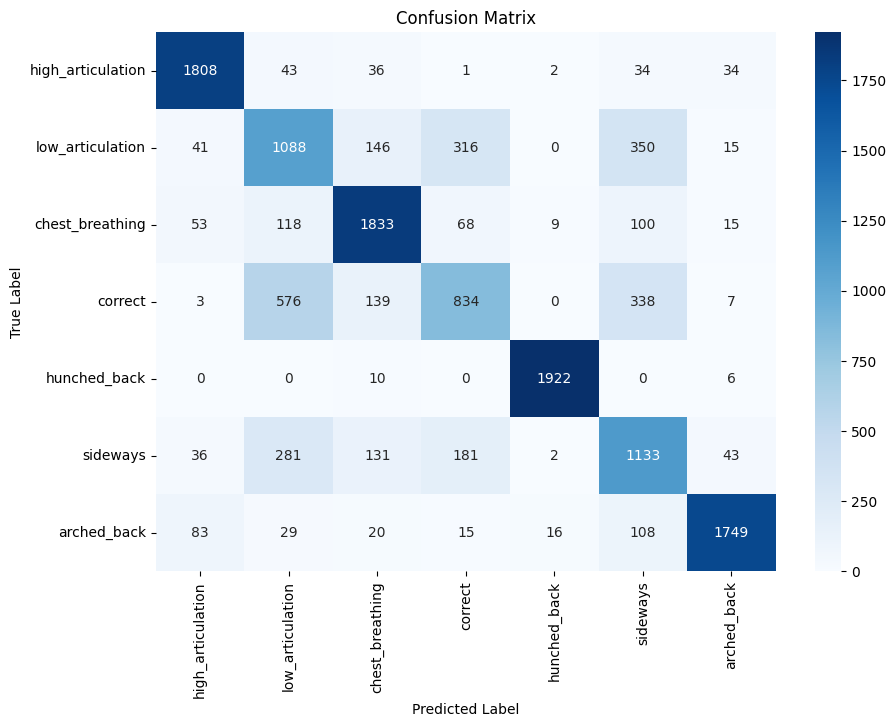

In [6]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 2. Audio Only

In [7]:
modalities = [
    "audio"
]

Mean cross-validated F1 score: 0.3062128364546958
f1 score:  0.3031136713276808
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.29      0.29      0.29      1958
 low_articulation       0.30      0.34      0.32      1956
  chest_breathing       0.26      0.24      0.25      2196
          correct       0.40      0.42      0.41      1897
     hunched_back       0.29      0.45      0.36      1938
         sideways       0.32      0.33      0.33      1807
      arched_back       0.34      0.13      0.19      2020

         accuracy                           0.31     13772
        macro avg       0.32      0.31      0.31     13772
     weighted avg       0.31      0.31      0.30     13772



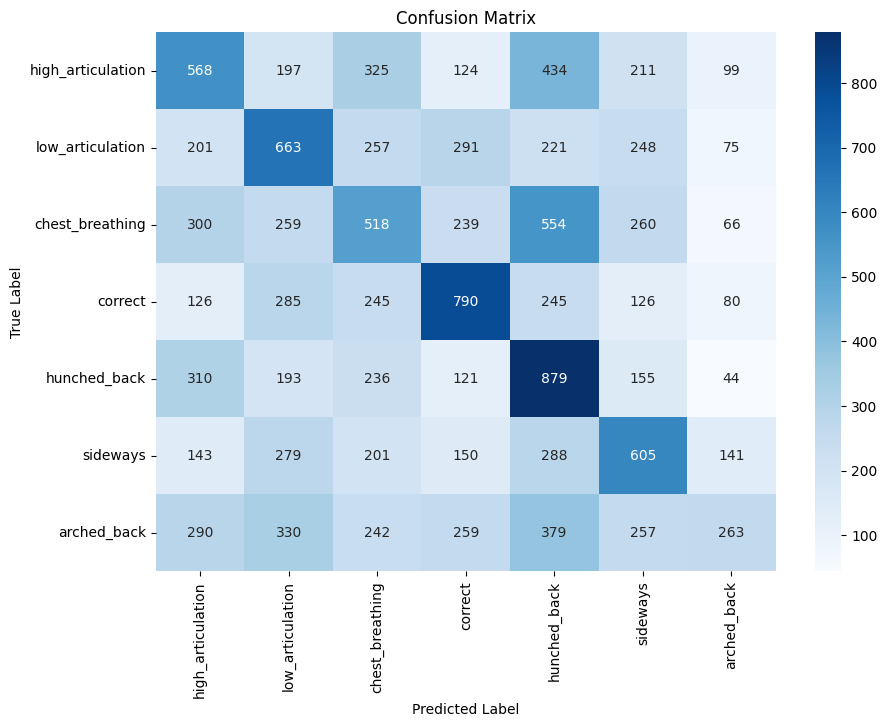

In [8]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 audio features

Selected features:  Index(['computer_spec_cent', 'computer_tristimulus3', 'computer_mfcc_1',
       'computer_mfcc_3', 'computer_mfcc_7'],
      dtype='object')
Mean cross-validated F1 score: 0.2126496151029314
f1 score:  0.20534220141273948
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.18      0.39      0.25      1958
 low_articulation       0.21      0.22      0.22      1956
  chest_breathing       0.21      0.15      0.18      2196
          correct       0.30      0.20      0.24      1897
     hunched_back       0.20      0.20      0.20      1938
         sideways       0.34      0.13      0.19      1807
      arched_back       0.17      0.16      0.17      2020

         accuracy                           0.21     13772
        macro avg       0.23      0.21      0.21     13772
     weighted avg       0.23      0.21      0.21     13772



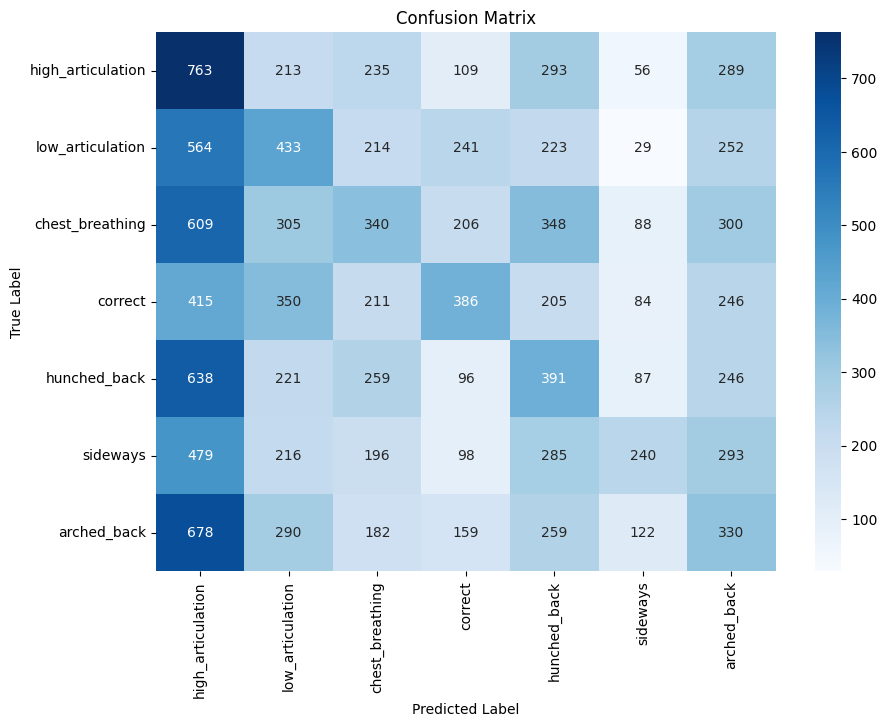

In [9]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Standardized data

Mean cross-validated F1 score: 0.3062128364546958
f1 score:  0.3031136713276808
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.29      0.29      0.29      1958
 low_articulation       0.30      0.34      0.32      1956
  chest_breathing       0.26      0.24      0.25      2196
          correct       0.40      0.42      0.41      1897
     hunched_back       0.29      0.45      0.36      1938
         sideways       0.32      0.33      0.33      1807
      arched_back       0.34      0.13      0.19      2020

         accuracy                           0.31     13772
        macro avg       0.32      0.31      0.31     13772
     weighted avg       0.31      0.31      0.30     13772



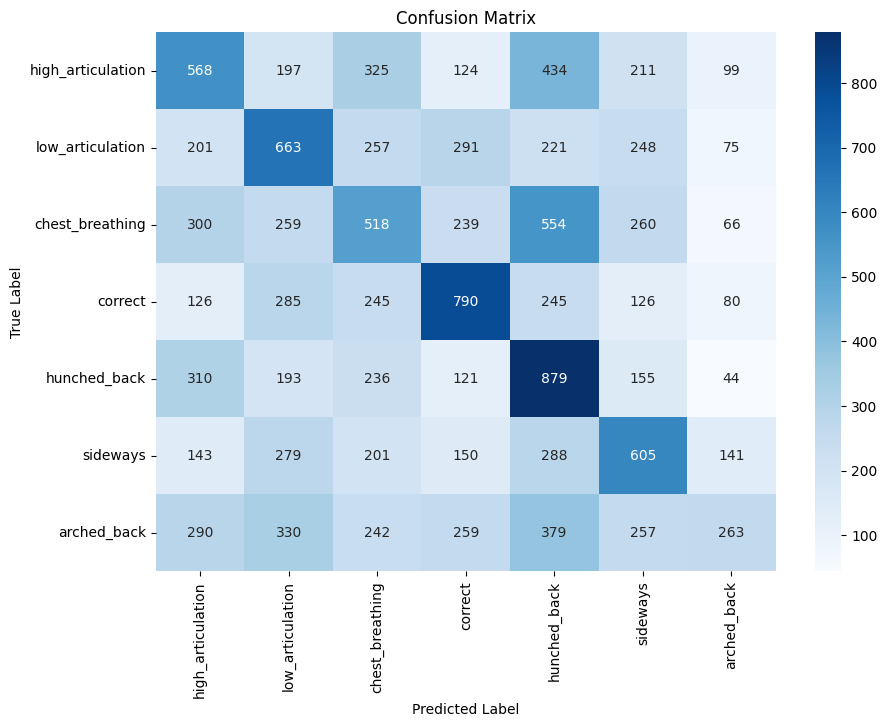

In [10]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
x_train, x_test = standardize_x_data(x_train, x_test)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Standardizing the data doesnt seem to impact the performance of the model.

## 3. Video Only

In [11]:
modalities = [
    "video"
]

Mean cross-validated F1 score: 0.9994372543638509
f1 score:  0.9993464550939403
Classification Report:
                   precision    recall  f1-score   support

high_articulation       1.00      1.00      1.00      1958
 low_articulation       1.00      1.00      1.00      1956
  chest_breathing       1.00      1.00      1.00      2196
          correct       1.00      1.00      1.00      1897
     hunched_back       1.00      1.00      1.00      1938
         sideways       1.00      1.00      1.00      1807
      arched_back       1.00      1.00      1.00      2020

         accuracy                           1.00     13772
        macro avg       1.00      1.00      1.00     13772
     weighted avg       1.00      1.00      1.00     13772



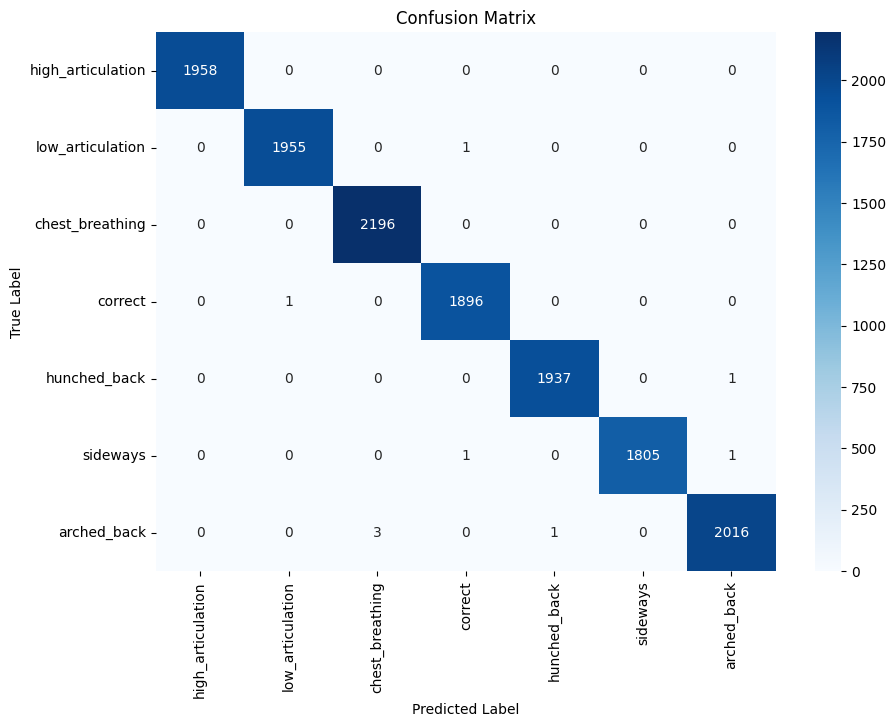

In [12]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 Video features

Selected features:  Index(['computer_pose_landmark_6_z', 'computer_pose_landmark_7_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Mean cross-validated F1 score: 0.7551647256339591
f1 score:  0.7514510255479576
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.89      0.92      0.91      1958
 low_articulation       0.51      0.56      0.53      1956
  chest_breathing       0.79      0.83      0.81      2196
          correct       0.59      0.44      0.50      1897
     hunched_back       0.99      0.99      0.99      1938
         sideways       0.55      0.63      0.59      1807
      arched_back       0.94      0.87      0.90      2020

         accuracy                           0.75     13772
        macro avg       0.75      0.75      0.75     13772
     weighted avg       0.75      0.75      0.75     13772



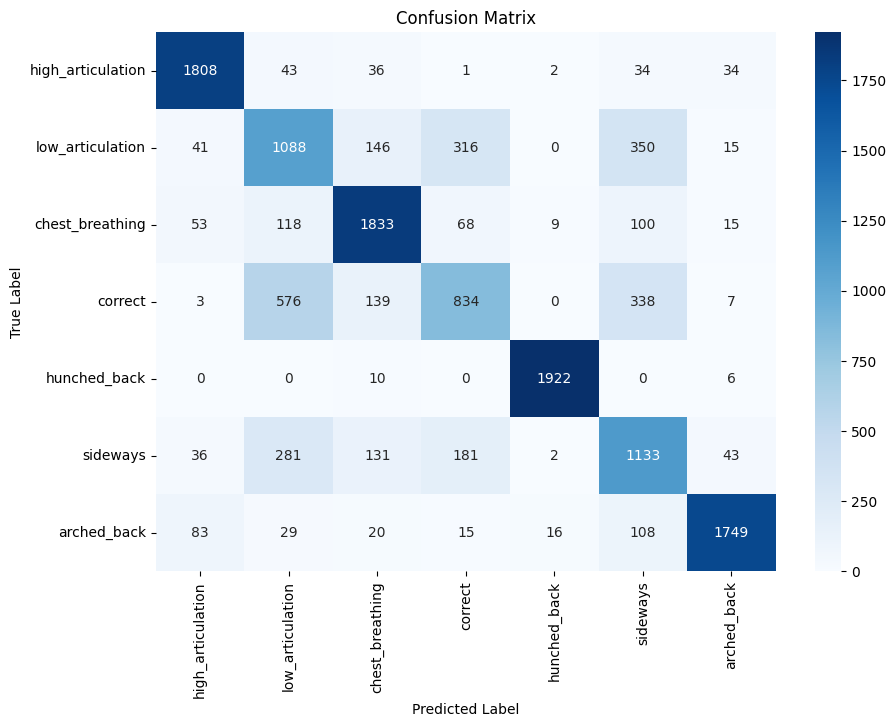

In [13]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 4. Biosignal only

In [14]:
modalities = [
    "biosignals"
]

Mean cross-validated F1 score: 0.3395996924538531
f1 score:  0.33991540586466323
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.24      0.39      0.30      1958
 low_articulation       0.43      0.52      0.47      1956
  chest_breathing       0.25      0.32      0.28      2196
          correct       0.94      0.46      0.62      1897
     hunched_back       0.26      0.38      0.31      1938
         sideways       0.43      0.33      0.37      1807
      arched_back       0.18      0.03      0.05      2020

         accuracy                           0.35     13772
        macro avg       0.39      0.35      0.34     13772
     weighted avg       0.39      0.35      0.34     13772



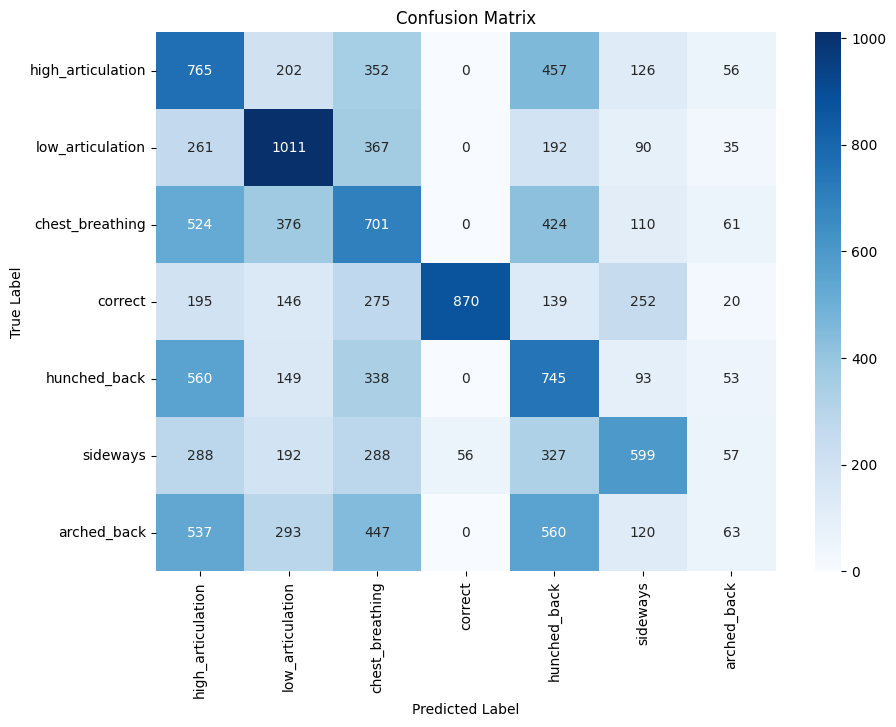

In [15]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

# Separating classification of posture related flaws and other error conditions

These models are tested only with the top 5 features selection and with either audio or video modalities.

## Posture only

### Audio or Video

Selected features:  Index(['computer_pose_landmark_5_z', 'computer_pose_landmark_6_z',
       'computer_pose_landmark_7_z', 'computer_pose_landmark_8_z',
       'computer_pose_landmark_9_z'],
      dtype='object')
Mean cross-validated F1 score: 0.8419151138559828
f1 score:  0.847929669830011
Classification Report:
              precision    recall  f1-score   support

     correct       0.77      0.79      0.78      1959
hunched_back       0.77      0.79      0.78      2195
    sideways       0.94      0.98      0.96      1938
 arched_back       0.92      0.85      0.88      2020

    accuracy                           0.85      8112
   macro avg       0.85      0.85      0.85      8112
weighted avg       0.85      0.85      0.85      8112



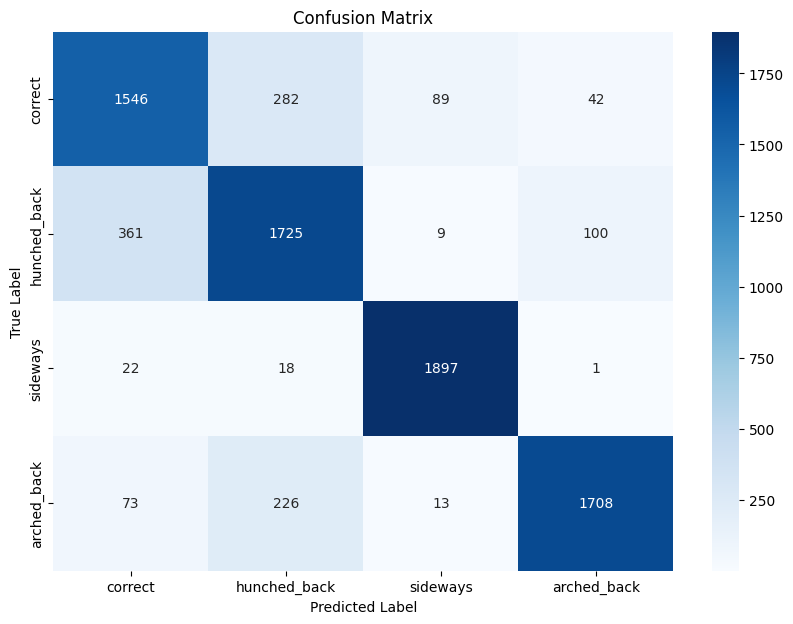

In [16]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio', 'video']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

# Evaluate MLP on test set
f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Audio Only

Selected features:  Index(['computer_spec_cent', 'computer_spec_slope', 'computer_spec_decr',
       'computer_mfcc_1', 'computer_mfcc_10'],
      dtype='object')
Mean cross-validated F1 score: 0.2934866517927225
f1 score:  0.3062018240583652
Classification Report:
              precision    recall  f1-score   support

     correct       0.25      0.23      0.24      1959
hunched_back       0.31      0.35      0.33      2195
    sideways       0.35      0.25      0.29      1938
 arched_back       0.33      0.40      0.37      2020

    accuracy                           0.31      8112
   macro avg       0.31      0.31      0.31      8112
weighted avg       0.31      0.31      0.31      8112



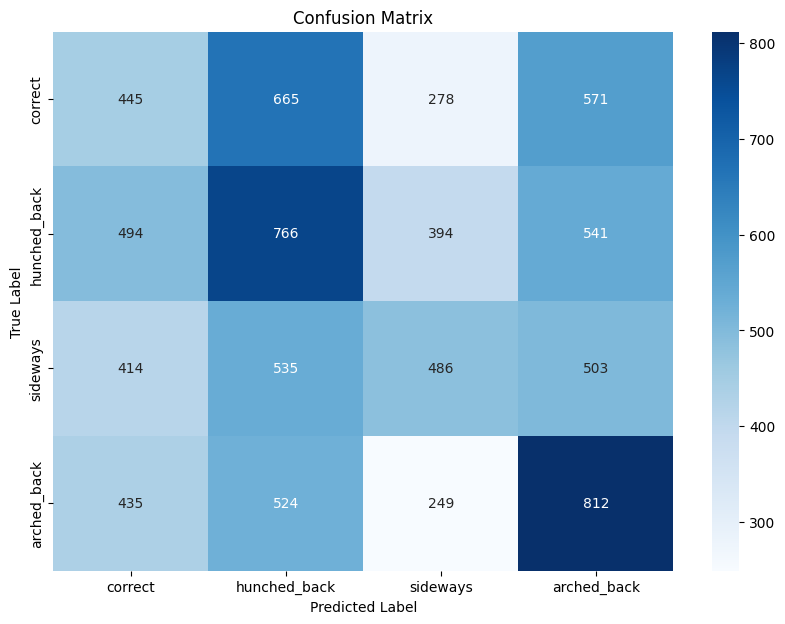

In [17]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

# Evaluate MLP on test set
f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

## Other error conditions only

### Audio or video

Selected features:  Index(['computer_pose_landmark_13_x', 'computer_pose_landmark_14_y',
       'computer_pose_landmark_16_y', 'computer_pose_landmark_24_y',
       'computer_pose_landmark_25_y'],
      dtype='object')
Mean cross-validated F1 score: 0.9348008952997956
f1 score:  0.9329584963586884
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.96      0.96      0.96      1956
 low_articulation       0.96      0.95      0.96      2196
  chest_breathing       0.96      0.88      0.92      1897
          correct       0.85      0.93      0.89      1807

         accuracy                           0.93      7856
        macro avg       0.93      0.93      0.93      7856
     weighted avg       0.93      0.93      0.93      7856



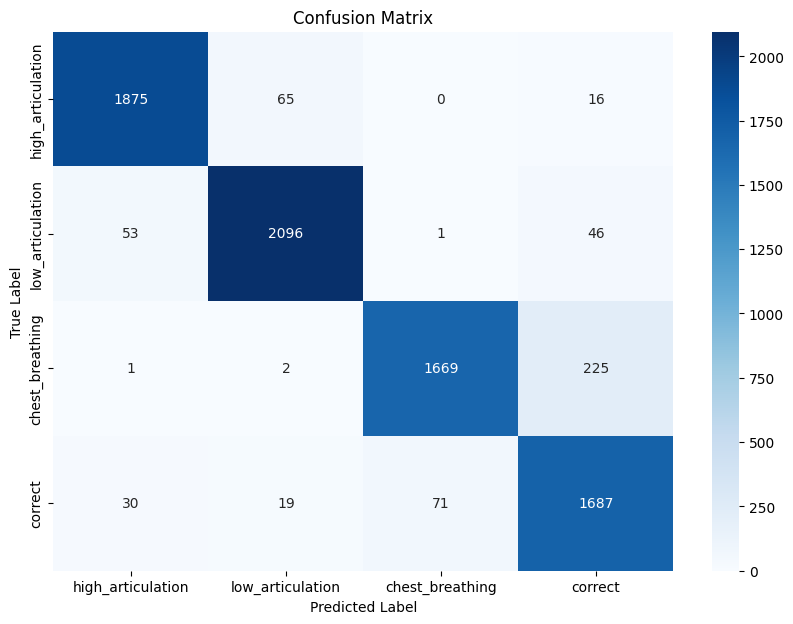

In [18]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']
modalities = ['audio', 'video']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

# Evaluate MLP on test set
f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Audio only

Selected features:  Index(['computer_tristimulus1', 'computer_tristimulus3', 'computer_mfcc_3',
       'computer_mfcc_7', 'computer_mfcc_9'],
      dtype='object')
Mean cross-validated F1 score: 0.3325213220686193
f1 score:  0.34431764196193027
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.35      0.36      0.36      1956
 low_articulation       0.34      0.31      0.33      2196
  chest_breathing       0.37      0.34      0.35      1897
          correct       0.32      0.36      0.34      1807

         accuracy                           0.34      7856
        macro avg       0.35      0.35      0.34      7856
     weighted avg       0.35      0.34      0.34      7856



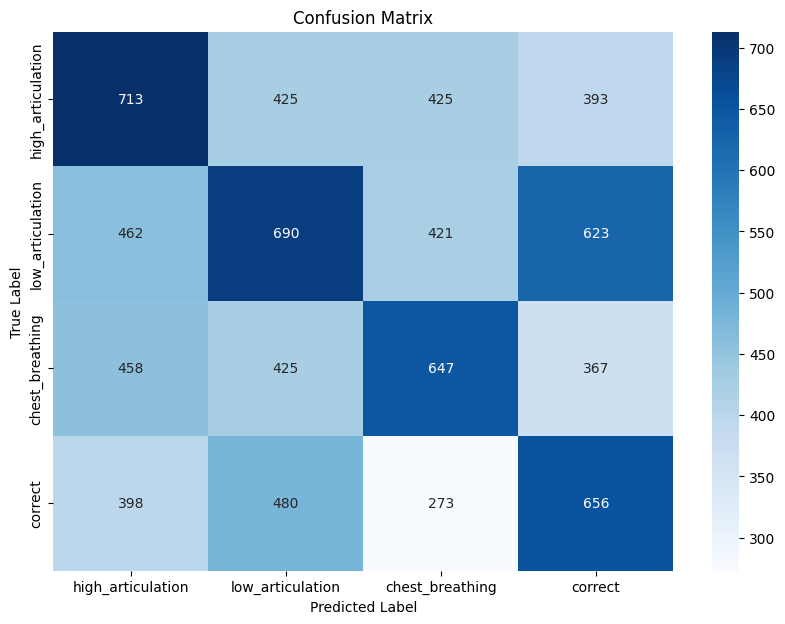

In [21]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=['audio'], conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_mlp(x_train, y_train, HIDDEN_LAYER_SIZE, RANDOM_STATE)

# Evaluate MLP on test set
f1, class_report, conf_matrix = evaluate_mlp(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

cross fold validation

transformers on spectograms -- audio classification with spectrograms

focus on feature extraction and improving the models
try other classifiers e.g. random forest and SVM
and a simple test with a spectogram for comparison - CNN using keras

### Using CFS feature selection